In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "hVR5LqvEj6gVz0aFjb2ZncujD"
Consumer_Secret_Key = "M6QUpMwZwPeUPZEOlQ0Rk2xX7i3Lux0DYcu67rQhkH4U56LUlB" 
Access_Token = "1205070840666062848-b2zhxJ23q7dLAtMCn06eq4emogwUEN"
Access_Token_Secret = "YY48zF7TsKAwu57vhHEL21gp3jBbZkxtzKssWm6ttILmH"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="indosatim3", count = 2000, lang = "eng", tweet_mode = "extended")

print("Show the 10 recent tweets: \n")
i=1
for tweet in posts[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i=i+1

Show the 10 recent tweets: 

1) @phex_phi Hai Kak, maaf untuk pengalamanya, yuk bisa cek Dm Mimin ya, salam ^Rere

2) @bastianaditya21 Hai Kak, maaf banget ya Kak terkait hal tersebut udah Mimin infoin detailnya via DM nih Kak. Yuk bisa cek DM dari Mimin ya Kak. Mimin tungguin ya Kak. ^Mala https://t.co/IGGiVZgYmt

3) @antonhardcore3 Hai kak Anton, ada yang bisa kami bantu? Yuk infokan pertanyaan atau keluhannya terkait produk IM3 via DM ya kak dengan senang hati kami akan bantu. Salam ^Leon https://t.co/IGGiVZgYmt

4) @phex_phi Baik kakak maaf banget buat kakak gak nyaman. Agar bisa mimin bantu cek lebih lanjut yuk bisa infoin nomornya, detail lokasi saat ini, dan nomor alternatif yang bisa dihubungi via DM ya kak. https://t.co/IGGiVZgYmt

5) @ardiananton Hallo Kak Ardian, maaf ya Kak. Mimin coba bantu infoin lewat DM ya Kak. Yuk Kak cek DM nya. Salam ^Nina https://t.co/IGGiVZgYmt

6) @ardiananton Hai Kak maaf untuk pengalamanya, namun bisa infokan Mimin nomor Kakak via Dm agar Mimin 

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,"@phex_phi Hai Kak, maaf untuk pengalamanya, yu..."
1,"@bastianaditya21 Hai Kak, maaf banget ya Kak t..."
2,"@antonhardcore3 Hai kak Anton, ada yang bisa k..."
3,@phex_phi Baik kakak maaf banget buat kakak ga...
4,"@ardiananton Hallo Kak Ardian, maaf ya Kak. Mi..."


In [ ]:
def cleanTxt(text):
  text = re.sub('@[A-Za-z0-9]+', '', text)
  text = re.sub('#', '', text)
  text = re.sub('RT[\s]+', '', text)
  text = re.sub('https?:\/\/\S+', '', text)

  return text

df['Tweets'] = df['Tweets'].apply(cleanTxt)

df

,Tweets
0,"_phi Hai Kak, maaf untuk pengalamanya, yuk bis..."
1,"Hai Kak, maaf banget ya Kak terkait hal terse..."
2,"Hai kak Anton, ada yang bisa kami bantu? Yuk ..."
3,_phi Baik kakak maaf banget buat kakak gak nya...
4,"Hallo Kak Ardian, maaf ya Kak. Mimin coba ban..."
...,...
195,"Halo Kak, mimin ngerti perasaan Kakak. Mimin ..."
196,"Hai Kak William, maaf banget ya Kak. Boleh tu..."
197,Mimin ngerti perasaan Kak Aziz. Kakak bisa ce...
198,"_ahpin Halo, Kak Aphin maaf utk pengalamannya ..."


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return TextBlob(text).sentiment.polarity

df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,"_phi Hai Kak, maaf untuk pengalamanya, yuk bis...",0.000000,0.00
1,"Hai Kak, maaf banget ya Kak terkait hal terse...",0.000000,0.00
2,"Hai kak Anton, ada yang bisa kami bantu? Yuk ...",0.000000,0.00
3,_phi Baik kakak maaf banget buat kakak gak nya...,0.000000,0.00
4,"Hallo Kak Ardian, maaf ya Kak. Mimin coba ban...",0.000000,0.00
...,...,...,...
195,"Halo Kak, mimin ngerti perasaan Kakak. Mimin ...",0.500000,-0.50
196,"Hai Kak William, maaf banget ya Kak. Boleh tu...",0.650000,0.15
197,Mimin ngerti perasaan Kak Aziz. Kakak bisa ce...,0.000000,0.00
198,"_ahpin Halo, Kak Aphin maaf utk pengalamannya ...",0.000000,0.00


<function matplotlib.pyplot.show(*args, **kw)>

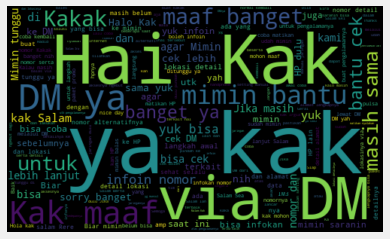

In [ ]:
allwords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allwords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show

In [ ]:
def getAnalysis(score):

  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,"_phi Hai Kak, maaf untuk pengalamanya, yuk bis...",0.000000,0.00,Neutral
1,"Hai Kak, maaf banget ya Kak terkait hal terse...",0.000000,0.00,Neutral
2,"Hai kak Anton, ada yang bisa kami bantu? Yuk ...",0.000000,0.00,Neutral
3,_phi Baik kakak maaf banget buat kakak gak nya...,0.000000,0.00,Neutral
4,"Hallo Kak Ardian, maaf ya Kak. Mimin coba ban...",0.000000,0.00,Neutral
...,...,...,...,...
195,"Halo Kak, mimin ngerti perasaan Kakak. Mimin ...",0.500000,-0.50,Negative
196,"Hai Kak William, maaf banget ya Kak. Boleh tu...",0.650000,0.15,Positive
197,Mimin ngerti perasaan Kak Aziz. Kakak bisa ce...,0.000000,0.00,Neutral
198,"_ahpin Halo, Kak Aphin maaf utk pengalamannya ...",0.000000,0.00,Neutral


In [ ]:
print('Printing negative tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=False)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing negative tweets:

11)  Sorry banget ya Kak buat pengalamannya. Agar aksesnya ngebut lagi, mimin saranin OFF-ON kan HP dulu ya. Kalau masih sama, infoin nomor HP, lokasi detail, dan nomor alternatifnya ya lewat DM. Salam^Sea 

12)  Hola Kak Toni, sorry banget nih terkait akses internetnya Kak, untuk solusi awal mimin saranin lakukan on-off HP dulu yuk. kalo masih sama, yuk infoin nomor, signal baris, lokasi dan no alt via dm ya, Thankyou^Ara


13)  Okey Kak, sorry banget ya agar Mimin bantu cek lebih lanjut yuk infokan data dulu yang udah Mimin sebutkan melalui DM ya. ^Dila 

14) _phi Halo Kak, Sorry banget atas hal yang dirasa. Tenang ya kak, mimin ada solusi nih buat kakak. Yuk Setting Airplane mode beberapa saat lalu setting jaringan manual. Apabila masih sama boleh infokan nomor, detail lokasi &amp; No. Alt via DM ya. Let's Go ^Ily 

15)  SIang Kak, sorry banget ya Mimin sarankan bisa matikan HP sesaat ya. Jika masih sama silakan bisa infokan detailnya via DM ya agar Mimin 

In [ ]:
print('Printing positive tweets:\n')
j=i
sortedDF = df.sort_values(by=['Polarity'],ascending=True)
for i in range(0,sortedDF.shape[0] ):
  if( sortedDF['Analysis'][i] == 'Positive'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Printing positive tweets:

199)  Halo Kak Juwita, Selamat Sore:) Ada yang bisa mimin bantu nih kak? Yuk sampaikan detailnya ke mimin ya serta nomornya juga jangan lupa. Agar mimin bantu cek ricek lebih lanjut, ditunggu ya and Have a nice day Kak^Ily

200)  Hai Kak, utk paket Freedom Internet full kuota utama 100% ya Kak. Silakan bisa cek lebih lanjut melalui *123 atau aplikasi myIM3 yah. Salam^Lya

201)  Huhuu maaf bgt ya kak Rachel. Terkait penyesuaian tarif produk IM3 merupakan bentuk peningkatan Layanan dan Kualitas terbaik utk pelanggan IM3 kak. Eitss, tp jgn khawatir kakak bisa cek paket promo-promo juga kok di *123*60, *929 dan Apk myIM3 kak. Have a nice day. Salam^Alin

202)  Halo Kak, Selamat Siang :) Ada yang bisa mimin bantu nih kak? Yuk sampaikan detailnya ke mimin ya serta nomornya juga jangan lupa. Agar mimin bantu cek ricek lebih lanjut, ditunggu ya and Have a nice day Kak^Ily

203) _yanti Halo Kak Mella, maaf untuk pengalamannya ya kak. Saat ini mimin bantu follow up ke 

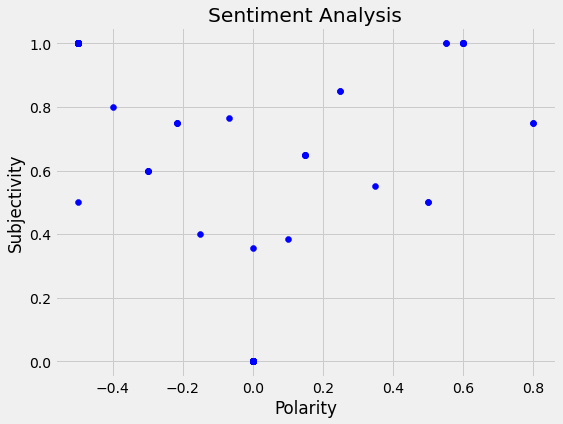

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df["Polarity"][i], df["Subjectivity"][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

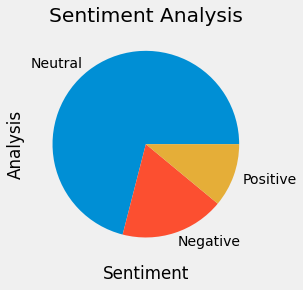

In [ ]:
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
df['Analysis'].value_counts()

Neutral     142
Negative     36
Positive     22
Name: Analysis, dtype: int64